In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import pyarrow as pa
import math

In [2]:
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.mllib.feature import Word2Vec, Word2VecModel
from sklearn.decomposition import PCA

In [3]:
path = '../Jasonmodel1/2000/data/part-00000-4a414ece-f40e-4cc6-a7ec-90a3867caa02-c000.snappy.parquet'
##model result: original model data zipped in .parquet (can find under model/data)

In [9]:
table = pq.read_table(path)
sameModel = Word2VecModel.load(sc, "../mymodel6")
df = table.to_pandas()

In [13]:
close_words = sameModel.findSynonyms('data', 30)
list(close_words)

[('keyvalue', 0.32391351461410522),
 ('most', 0.30858522653579712),
 ('facts', 0.28448927402496338),
 ('amounts', 0.28257989883422852),
 ('store', 0.27855601906776428),
 ('pandas', 0.27636516094207764),
 ('massive', 0.27335289120674133),
 ('datasets', 0.27256855368614197),
 ('ingestion', 0.27018037438392639),
 ('reliable', 0.2699015736579895),
 ('mapped', 0.26898419857025146),
 ('topology', 0.26228830218315125),
 ('results', 0.25790819525718689),
 ('biological', 0.25580444931983948),
 ('replicated', 0.25391426682472229),
 ('probabilistic', 0.25326594710350037),
 ('electronic', 0.24812886118888855),
 ('prices', 0.24546189606189728),
 ('normalized', 0.24235600233078003),
 ('population', 0.24037334322929382),
 ('anomalies', 0.23806920647621155),
 ('blobs', 0.23481070995330811),
 ('sampling', 0.23375652730464935),
 ('throughput', 0.23324631154537201),
 ('performs', 0.231280118227005),
 ('projection', 0.22928433120250702),
 ('forecast', 0.22917634248733521),
 ('wikipedia', 0.228236317634582

In [6]:
def PCA_plot(df, target):
    "target is a set of words"
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for index, row in df.iterrows():
        tokens.append(row['vector'])
        labels.append(row['word'])
    
    pca = PCA(n_components = 500)
    pca.fit(tokens)
    #print(pca.explained_variance_ratio_)
    tokens = pca.transform(tokens)
    xs = tokens[:, 0]
    ys = tokens[:, 1]

    # draw
    plt.figure(figsize=(16,18))
    #plt.scatter(xs, ys, marker = 'o')
    for i, w in enumerate(df['word']):
        if w in target:
            plt.scatter(xs[i], ys[i], marker = 'o')
            plt.annotate(
            w,
            xy = (xs[i], ys[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top')

    plt.show()

In [7]:
interestwords = ['application','algorithm','data']
target = set(interestwords)
for temp_word in interestwords:
    close_words, value = zip(*sameModel.findSynonyms(temp_word, 9))
    target = target | set(close_words)

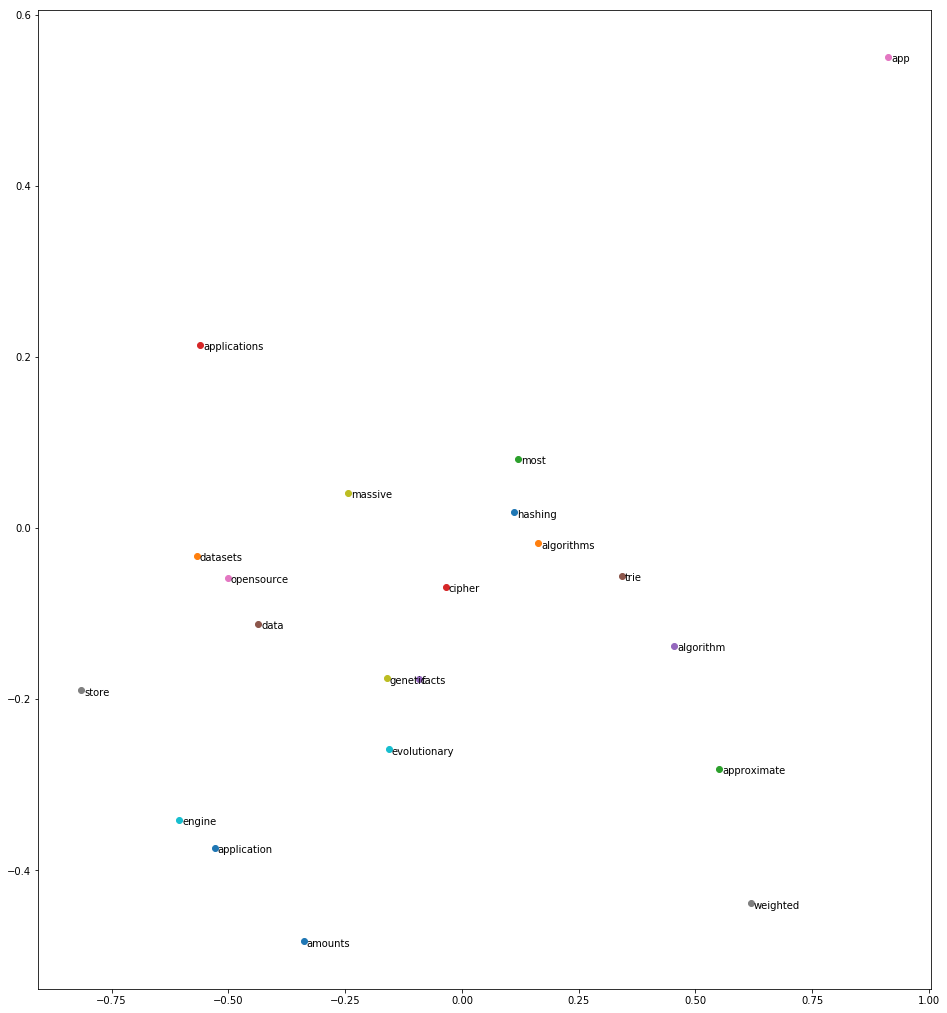

In [10]:
PCA_plot(df, set(target))

In [11]:
def getmaxcos(target, df):
    "find the cloest word: hope this function works right"
    maxcos = 0
    a = a = np.where(df['word']==target)[0][0]
    v_a = df['vector'][a].reshape(1,-1)
    minword = ""
    
    for index, word in df['word'].iteritems():
        v_b = df['vector'][index].reshape(1,-1)
        word = df['word'][index]
        cos_sim = cosine_similarity(v_a, v_b)
        
        
        if cos_sim > maxcos and word != target:
            minword = word
            maxcos = cos_sim[0][0]
            
    print(minword + " " + str(math.acos(maxcos)) + " " + str(maxcos))

In [12]:
getmaxcos('data', df)

checkpoints 0.9973793821711832 0.542506


In [ ]:
def get_tsne(df):
    "Creates and TSNE model and plots it"
    "recommend not to run: it costs long time"
    labels = []
    tokens = []

    for index, row in df.iterrows():
        tokens.append(row['vector'])
        labels.append(row['word'])
    
    tokens = np.asarray(tokens)
    tsne_model = TSNE(n_components=2, perplexity=20.0, init='pca')
    new_values = tsne_model.fit_transform(tokens)
    
    return new_values

In [ ]:
def tsne_plot(new_values, df, target):
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i, w in enumerate(df['word']):
        if w in target:
            plt.scatter(x[i], y[i], marker = 'o')
            plt.annotate(
            w,
            xy = (x[i], y[i]), xytext = (3, 3),
            textcoords = 'offset points', ha = 'left', va = 'top')
    #Below will give annotation for all words
    #for i in range(len(x)):
        #plt.scatter(x[i],y[i])
        ##plt.annotate(labels[i],
        ##             xy=(x[i], y[i]),
        ##             xytext=(5, 2),
        ##             textcoords='offset points',
        ##             ha='right',
        ##             va='bottom')
    plt.show()

In [ ]:
#trigger tsne. I think it is time consuming.
new_values = get_tsne(df)
interestwords = ['application','algorithm']
target = set(interestwords)
for temp_word in interestwords:
    close_words, value = zip(*sameModel.findSynonyms(temp_word, 9))
    target = target | set(close_words)

In [ ]:
tsne_plot(new_values, df, target)